<a href="https://colab.research.google.com/github/AlvisSu/20220702-python-lesson/blob/main/20220730.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用Teachable Machine

In [61]:
#解壓縮
!unzip model.zip

unzip:  cannot find or open model.zip, model.zip.zip or model.zip.ZIP.


In [62]:
from keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

# Load the model
model = load_model('keras_model.h5')

# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1.
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
# Replace this with the path to your image
image = Image.open('00725.jpg')
#resize the image to a 224x224 with the same strategy as in TM2:
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

#turn the image into a numpy array
image_array = np.asarray(image)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
# Load the image into the array
data[0] = normalized_image_array

# run the inference
prediction = model.predict(data)
print(prediction)

OSError: ignored

# 使用Gradio打包上面的模型來使用

In [ ]:
!pip install gradio

In [ ]:
import random

In [ ]:
def classify(image):
  # Load the model
  model = load_model('keras_model.h5')

  image.save(f"{random.randint(0, 10000):05}.jpg")

  # Create the array of the right shape to feed into the keras model
  # The 'length' or number of images you can put into the array is
  # determined by the first position in the shape tuple, in this case 1.
  data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
  # Replace this with the path to your image
  # image = Image.open('AS.png')
  #resize the image to a 224x224 with the same strategy as in TM2:
  #resizing the image to be at least 224x224 and then cropping from the center
  size = (224, 224)
  image = ImageOps.fit(image, size, Image.ANTIALIAS)

  #turn the image into a numpy array
  image_array = np.asarray(image)
  # Normalize the image
  normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
  # Load the image into the array
  data[0] = normalized_image_array

  # run the inference
  prediction = model.predict(data)
  labels = ["戴著口罩的A", "沒有戴口罩的A"]
  return labels[np.argmax(prediction)]

In [67]:
import gradio as gr

In [ ]:
gr.Interface(classify, inputs=gr.Image(type="pil"), outputs="text").launch(share=True)

In [ ]:
from PIL import Image

In [ ]:
im = Image.open("05553.jpg")

In [ ]:
classify(im)

In [ ]:
x = [1, 2, 3, 4, 3, 2, 1]

In [ ]:
#讓y最大的x值
#y=f(x)
np.argmax(x)

## 練習

請輸出0-15的二進位及時溜進位的數值

In [ ]:
#i:2>>保持兩位數，i:02>>兩位數+0
for i in range(16):
  print(f"{i:2}的二進位是:{i:b}")

In [ ]:
#對齊、補0
for i in range(16):
  print(f"{i:2}的二進位是:{i:04b}")

# Scikit-Learn 簡介

```python
1.載入模型

from sklearn.svm import SVC

2.建立模型

clf = SVC()

3.訓練模型

clf.fit(x_train, y_train)

4.使用模型

y_predict = clf.predict(x_test)
```

## 載入資料集

In [ ]:
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.feature_names

In [ ]:
iris.target_names

In [ ]:
X = iris.data

In [ ]:
y = iris.target

In [ ]:
X[0]

In [ ]:
len(X)

In [ ]:
y[0]

In [ ]:
y

## 拆分訓練集及測試集

X:題目

Y:答案

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#網站抓取原資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#20%拿來做測試
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 使用SVM來做分類

In [ ]:
#1. 載入模型
from sklearn.svm import SVC

In [ ]:
#2. 建立模型
clf = SVC()

In [ ]:
#3. 訓練模型
clf.fit(X_train, y_train)

In [ ]:
# 計算模型準確度(Accuracy)
clf.score(X_test, y_test)

In [ ]:
#4. 使用模型
clf.predict(X_test)

## 使用Random Forest來做分類

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
#1. 載入模型
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#2. 建立模型
#clf = RandomForestClassifier(max_depth=2, random_state=0)
#clf = RandomForestClassifier() << 使用預設
clf = RandomForestClassifier()

In [ ]:
#3. 訓練模型
clf.fit(X_train, y_train)

In [ ]:
# 計算模型準確度(Accuracy)
clf.score(X_test, y_test)

In [ ]:
#4. 使用模型
clf.predict(X_test)

### 太多資訊over fitting

# 使用Mediapipe畫出手的關節點

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = ["hand.jpg"]
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        'hand.jpg' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

file = 'my_hand.jpg'
with mp_hands.Hands(static_image_mode=True,max_num_hands=2,min_detection_confidence=0.5) as hands:
  image = cv2.flip(cv2.imread(file), 1)
  results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  image_height, image_width, _ = image.shape
  annotated_image = image.copy()
  for hand_landmarks in results.multi_hand_landmarks:
    mp_drawing.draw_landmarks(
        annotated_image,
        hand_landmarks,
        mp_hands.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
  cv2.imwrite('my_hand.png', cv2.flip(annotated_image, 1))

im = Image.open('my_hand.png')
im

# Homework 

寫一個gradio的APP，輸入手的圖形後，輸出畫上關節點的手的圖形。

In [ ]:
!pip install gradio

In [68]:
import matplotlib.pyplot as plt
def show(image):
  plt.imshow(image)
  return "Good"

gr.Interface(show, inputs="image", outputs="text").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://20451.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1c67247e90>,
 'http://127.0.0.1:7860/',
 'https://20451.gradio.app')

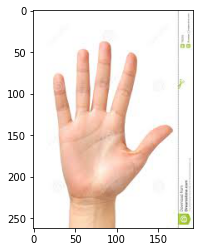

In [69]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

def draw_landmarks(image):
  with mp_hands.Hands(static_image_mode=True,max_num_hands=2,min_detection_confidence=0.5) as hands:
    image = cv2.flip(image, 1)
    results = hands.process(image)

    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    image = cv2.flip(annotated_image, 1)
    return image

In [70]:
gr.Interface(draw_landmarks, inputs="image", outputs="image").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://38737.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1c65f8f2d0>,
 'http://127.0.0.1:7861/',
 'https://38737.gradio.app')